# 3. XOR 문제 - 단층 퍼셉트론 구현

## 3.1 파이토치로 단층 퍼셉트론 구현하기

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(777)

In [8]:
pip install torch --upgrade

Note: you may need to restart the kernel to use updated packages.


In [22]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

In [ ]:
linear = nn.Linear(2,1,bias = True)`

sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid)

In [15]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1)

In [16]:
for step in range(10001) :
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0 :
        print(step,cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

# 4.  XOR 문제 - 다층 퍼셉트론 구현하기

In [23]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

In [24]:
model = nn.Sequential(
    ##input = 2 , hidden_layer1 = 10
        nn.Linear(2,10,bias=True),
        nn.Sigmoid(),
    ## hidden_layer1 = 10 , hidden_layer2 = 10
        nn.Linear(10,10, bias = True),
        nn.Sigmoid(),
    ## hidden_layer2 = 10 , hidden_layer3 = 10 
        nn.Linear(10,10, bias = True),
        nn.Sigmoid(),
    ## hidden_layer3 = 10, output = 1
        nn.Linear(10,1,bias = True),
        nn.Sigmoid())

In [25]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr = 1)

In [26]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084394454956
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 

# 6. 비선형 활성화 함수(Activation function)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

- 인공신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해주어야한다.
- 그런데 활성화함수로 선형함수를 사용하게 된다면, 은닉층을 사용할 수 없다.
- 선형함수로는 은닉층을 여러 번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다.
- 그렇기에 비선형 함수를 사용

### 렐루 함수(ReLU)

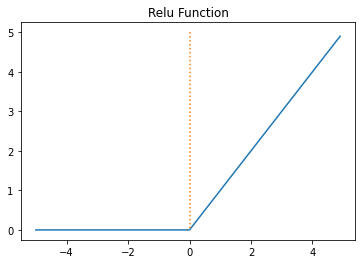

In [29]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

- 렐루 함수는 음수는 0 양수는 입력값 그대로 반환
- 렐루의 문제점은 입력값이 음수면 기울기가 0이기 때문에 그 뉴런을 다시 회생할 수 없는데 이러한 문제를 dying ReLU(죽은 렐루)라고 부른다.

### Leaky ReLU

- 죽은 렐루 보완하기 위해 등장

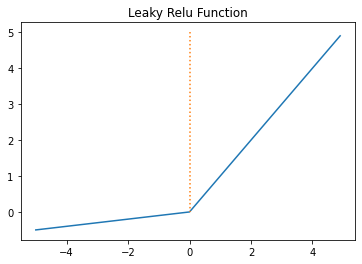

In [30]:
a = 0.1

def leaky_relu(x) :
    return np.maximum(a*x,x)


x = np.arange(-5.0,5.0,0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')

plt.title("Leaky Relu Function")
plt.show()

- 렐루는 은닉층에서 제일 많이 사용

### 비용함수 사용

- 이진 분류 : 시그모이드(nn.BCELoss())
- 다중 분류 : 소프트맥스(nn.CrossEntropyLoss())
- 회귀 : MSE

### ELu 함수

- 지수 함수를 이용하여 입력이 0이하일 경우 부드럽게 깎아준다.
- 별도의 알파값을 파라미터로 받는데 일반적으로 1로 설정
- 그 밖의 값을 가지는 경우 SeLU(scaled exponential linear unit)
- ReLU 장점 모두 포함
- Dying ReLU 문제 해결
- 출력값 거의 zero-centered
- ReLU, Leaky ReLU와 달리 지수함수에 대한 미분값을 계산

- ELU와 비슷한 꼴로 CELU가 존재

### PReLU

- Leaky와 비슷하나 a 파라미터를 추가하여 x < 0에서의 기울기를 학습시킬 수 있게 함

# 7. 다층 퍼셉트론으로 손글씨 분류하기

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()

In [32]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [33]:
print(digits.target[0])

0


In [35]:
digits.images.shape

(1797, 8, 8)

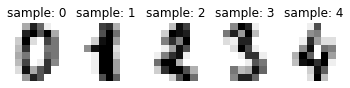

In [36]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [39]:
for i in range(5) :
    print(f'{i}번 인덱스 샘플의 레이블 : {digits.target[i]}')

0번 인덱스 샘플의 레이블 : 0
1번 인덱스 샘플의 레이블 : 1
2번 인덱스 샘플의 레이블 : 2
3번 인덱스 샘플의 레이블 : 3
4번 인덱스 샘플의 레이블 : 4


In [40]:
X = digits.data
y = digits.target

### 7-2. 다층 퍼셉트론 분류기 만들기


In [43]:
X.shape,y.shape

((1797, 64), (1797,))

In [69]:
model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10))

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []

/var/folders/dk/ymk6w43x56sfdv1f59k8tktm0000gn/T/ipykernel_1120/1986308024.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
/var/folders/dk/ymk6w43x56sfdv1f59k8tktm0000gn/T/ipykernel_1120/1986308024.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype = torch.int64)


In [70]:
for epoch in range(100) :
    optimizer.zero_grad()
    y_pred = model(X)
    
    loss = loss_fn(y_pred,y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0 :
        print('Epoch {:4d} / {} Cost : {:.6f}'.format(epoch+10,100,loss.item()))
        
    losses.append(loss.item())

Epoch   10 / 100 Cost : 2.451986
Epoch   20 / 100 Cost : 2.121753
Epoch   30 / 100 Cost : 1.852222
Epoch   40 / 100 Cost : 1.543306
Epoch   50 / 100 Cost : 1.197880
Epoch   60 / 100 Cost : 0.868392
Epoch   70 / 100 Cost : 0.610263
Epoch   80 / 100 Cost : 0.433294
Epoch   90 / 100 Cost : 0.322872
Epoch  100 / 100 Cost : 0.252908


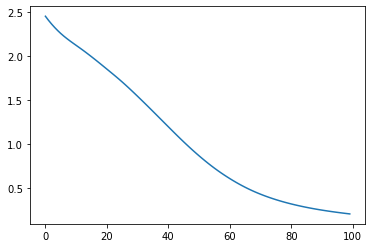

In [71]:
plt.plot(losses)